# **Property Rent Price Estimation**
Author: Waldy Setiono (waldysetiono@gmail.com)

**Background**: An online accomodation and space rental company based in South East Asia plans to expand its service area to the United States and the first city will be San Fransisco. The company is now conducting research to determine the pricing strategy in order to compete with existing similar companies. There has been no standard method to determine how much a property owners should cost their customers so this company considers analyzing historical pricing data of one of its major competitors to predict its potential future service prices.

**Data**: The data used in this project is from [data.world](https://data.world/ajsanne/sf-airbnb-listings).

## **Outline**

[1. Data Preparation](##**Data-Preparation**)

[2. Exploratory Data Analysis](##**Exploratory-Data-Analysis**)

[3. Feature Engineering](##**Feature-Engineering**)

[4. Model Development and Evaluation](##**Model-Development-and-Evaluation)


## **Data Cleaning and Preparation**

**Import packages and load data**

In [135]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [157]:
# Load and display the data
data = pd.read_csv("https://raw.githubusercontent.com/waldysetio/price-estimation/main/data/listings.csv")
data.tail(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,location
7571,35284961.0,https://www.airbnb.com/rooms/35284961,2.019060e+13,2019-06-02,Brand New Designer 2 BR SF Condo,Luxury spacious 2 bedroom condo located in SF‚...,Private dedicated entrance NEST temperature c...,Luxury spacious 2 bedroom condo located in SF‚...,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/8a21476f-d...,NaN,94857021,https://www.airbnb.com/users/show/94857021,D.,2016-09-12,"San Francisco, California, United States","Affable, caring, outgoing; passionate about tr...",within a few hours,1.00,NaN,false,https://a0.muscache.com/im/pictures/user/0c5dd...,https://a0.muscache.com/im/pictures/user/0c5dd...,South Lake Tahoe,2.0,2,"[''email'', ''phone'', ''google'', ''reviews''...",True,false,"San Francisco, CA, United States",Noe Valley,Noe Valley,...,3.0,1125.0,3,4,1125,1125,3.2,1125,today,True,26.0,56.0,86.0,86.0,2019-06-02,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,city registration pending,{SAN FRANCISCO},False,False,strict_14_with_grace_period,False,False,1.0,1.0,0.0,0.0,NaN,POINT(-122.42785 37.75227)
7572,35285751.0,https://www.airbnb.com/rooms/35285751,2.019060e+13,2019-06-02,Beautiful 1x1 in Historic Mission Tudor Building,A beautifully remodeled one bedroom in a great...,NaN,A beautifully remodeled one bedroom in a great...,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/3dcc87ae-7...,NaN,4430421,https://www.airbnb.com/users/show/4430421,Landmark,2012-12-17,US,We are a small company in San Francisco that o...,within a few hours,0.99,NaN,false,https://a0.muscache.com/im/pictures/17186de6-6...,https://a0.muscache.com/im/pictures/17186de6-6...,Noe Valley,92.0,92,"[''email'', ''phone'', ''reviews'', ''jumio'',...",True,false,"San Francisco, CA, United States",Noe Valley,Mission,...,30.0,150.0,30,30,150,150,30,150,today,True,23.0,53.0,83.0,173.0,2019-06-02,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,{SAN FRANCISCO},False,False,flexible,False,False,92.0,91.0,1.0,0.0,NaN,POINT(-122.42382 37.75455)
7573,35286441.0,https://www.airbnb.com/rooms/35286441,2.019060e+13,2019-06-02,Beautiful Queen Victorian in the heart of Mission,Our place is a charming Victorian located in t...,The house is a quintessential remodeled Victor...,Our place is a charming Victorian located in t...,none,Mission District is one of the fastest growing...,Please leave the house in the same condition y...,The house is located few blocks from two publi...,"Guests have access to the private bedroom, sha...",We will be traveling during your stay but reac...,- No visitors without prior

**Drop unrelated columns**

This project is not going to implement sentiment analysis or text processing to make a predictive model, maybe in the future. Hence, for now columns containing reviews, summary, rules, and so on will be dropped. Other columns that might not be related to price will be eliminated as well.

In [158]:
# Drop unused columns 
data = data.drop(["listing_url", "scrape_id", "last_scraped", "name", "summary", "space", 
           "description", "neighborhood_overview", "notes", "transit", "access",
           "interaction", "house_rules", "thumbnail_url", "medium_url", "picture_url",
           "xl_picture_url", "host_id", "host_url", "host_name", "host_location",
           "host_about", "host_thumbnail_url",	"host_picture_url", "host_thumbnail_url",
           "host_picture_url", "host_verifications", "street", "calendar_updated",
           "calendar_last_scraped", "number_of_reviews", "number_of_reviews_ltm",
           "first_review", "last_review", "license", "jurisdiction_names",
           "require_guest_profile_picture", "require_guest_phone_verification",
           "reviews_per_month", "location", "host_since", "host_neighbourhood",
           "host_listings_count", "host_has_profile_pic", "state", "country", 
           "weekly_price", "monthly_price", "host_response_time", "host_response_rate",
           "host_acceptance_rate", "host_is_superhost", "host_total_listings_count", 
           "host_identity_verified", "neighbourhood", "neighbourhood_group_cleansed",
           "city", "market", "smart_location", "country_code", "is_location_exact",
           "minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", 
           "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm", 
           "requires_license", "is_business_travel_ready", "amenities"
           ], axis=1)

**Missing values**

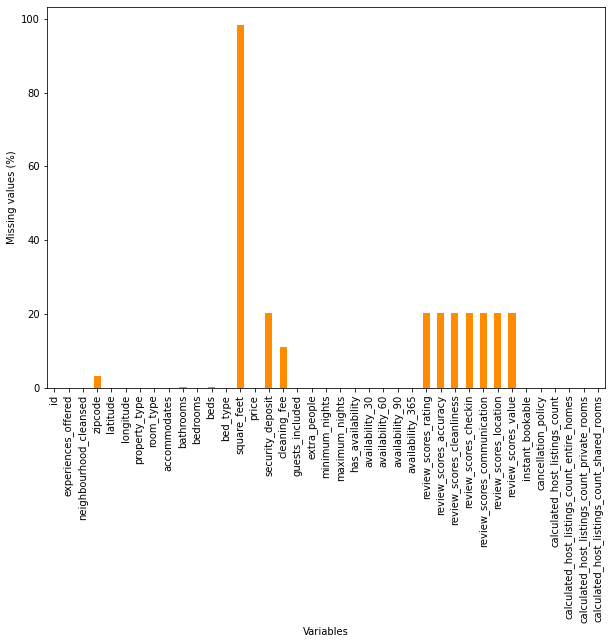

In [159]:
# Calculate missing values
missing_data_pecentage = data.isna().sum()/len(data.index)*100

# Plot missing values
missing_data_pecentage.plot(kind="bar", color="darkorange", figsize=(10,7))
plt.xlabel("Variables")
plt.ylabel("Missing values (%)")
plt.show()

**Drop column with significant missing values**

In [160]:
# Drop columns with significant missing data
data = data.drop(["square_feet", "security_deposit", "cleaning_fee", "review_scores_rating", 
                  "review_scores_accuracy", "review_scores_cleanliness", "zipcode", 
                  "review_scores_checkin", "review_scores_communication",
                  "review_scores_location", "review_scores_value"], axis=1)

**Check duplicates**

In [161]:
data[data.duplicated()]

,id,experiences_offered,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms


**Descriptive statistics**

In [162]:
# Print basic statistics of the data
data.describe()

,id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
count,7.575000e+03,7575.000000,7575.000000,7575.000000,7557.000000,7573.000000,7568.000000,7575.000000,7575.000000,7.575000e+03,7.575000e+03,7575.000000,7575.000000,7575.000000,7575.000000,7574.000000,7574.000000,7574.000000,7574.000000
mean,1.809650e+07,37.909368,-122.410157,3.217162,1.356160,1.363792,1.807875,1.736898,16.988251,1.321773e+04,1.374255e+04,6.466667,16.366601,29.190891,146.500066,20.719039,17.183919,3.003961,0.531159
std,1.117422e+07,12.492015,1.751583,1.952965,1.055384,1.384044,2.366081,1.365124,30.780825,1.148970e+06,1.148964e+06,8.977772,19.213692,29.170424,125.316038,51.744561,50.250164,7.185585,2.978158
min,9.580000e+02,37.704170,-122.513060,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,7.749788e+06,37.751075,-122.442910,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000e+00,2.900000e+01,0.000000,0.000000,2.000000,23.500000,1.000000,0.000000,0.000000,0.000000
50%,1.941397e+07,37.767680,-122.424930,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000e+00,1.800000e+02,2.000000,8.000000,19.000000,119.000000,2.000000,1.000000,0.000000,0.000000
75%,2.824180e+07,37.785400,-122.410880,4.000000,1.500000,2.000000,2.000000,2.000000,25.000000,3.000000e+01,1.125000e+03,10.000000,29.000000,52.000000,275.000000,7.000000,2.000000,2.000000,0.000000
max,3.529191e+07,1125.000000,30.000000,30.000000,60.000000,90.000000,180.000000,16.000000,300.000000,1.000000e+08,1.000000e+08,30.000000,60.000000,90.000000,365.000000,241.000000,241.000000,46.000000,25.000000


In [163]:
# Print the statistics including columns with object data type
data.describe(include=['object'])

,experiences_offered,neighbourhood_cleansed,property_type,room_type,bed_type,price,has_availability,instant_bookable,cancellation_policy
count,7576,7575,7575,7575,7575,7575,7575,7574,7574
unique,2,37,29,4,6,506,2,2,6
top,none,Mission,Apartment,Entire home/apt,Real Bed,150.00,True,False,strict_14_with_grace_period
freq,7575,729,3045,4594,7504,252,7574,4599,3339


In [164]:
# Print data types of each column
data.dtypes

id                                              float64
experiences_offered                              object
neighbourhood_cleansed                           object
latitude                                        float64
longitude                                       float64
property_type                                    object
room_type                                        object
accommodates                                    float64
bathrooms                                       float64
bedrooms                                        float64
beds                                            float64
bed_type                                         object
price                                            object
guests_included                                 float64
extra_people                                    float64
minimum_nights                                  float64
maximum_nights                                  float64
has_availability                                

Let's change the data type of "price" column to float.

In [167]:
# Convert "price" data type to float


In [143]:
# Check unique values of each column
print(data.apply(lambda col: col.unique()))

id                                              [958.0, 5858.0, 7918.0, 8142.0, 8339.0, 8567.0...
experiences_offered                                                                     [none, 1]
neighbourhood_cleansed                          [Western Addition, Bernal Heights, Haight Ashb...
latitude                                        [37.76931, 37.74511, 37.766690000000004, 37.76...
longitude                                       [-122.43386000000001, -122.42102, -122.4525, -...
property_type                                   [Apartment, House, Condominium, Townhouse, Lof...
room_type                                       [Entire home/apt, Private room, Shared room, n...
accommodates                                    [3.0, 5.0, 2.0, 6.0, 1.0, 4.0, 10.0, 8.0, 7.0,...
bathrooms                                       [1.0, 4.0, 1.5, 2.0, 3.0, 0.5, 0.0, nan, 2.5, ...
bedrooms                                        [1.0, 2.0, 3.0, 0.0, 4.0, nan, 5.0, 90.0, 7.0,...
beds                

**Address remaining NaN values**

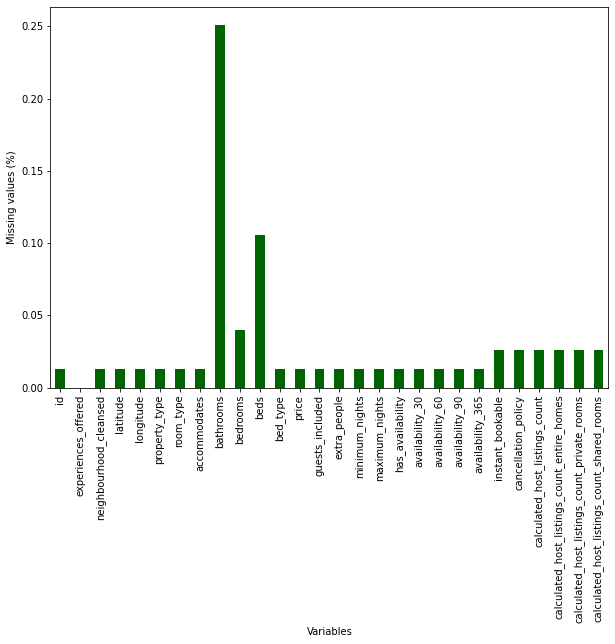

In [144]:
# Count NaN values
missing_data_pecentage = data.isna().sum()/len(data.index)*100

# Plot NaN values
missing_data_pecentage.plot(kind="bar", color="darkgreen", figsize=(10,7))
plt.xlabel("Variables")
plt.ylabel("Missing values (%)")
plt.show()

We will remove the row where "id" contains NaN values because it can't be replaced by suitable alternative such as median, mean, mode, or else.

In [150]:
# Find row in which "id" contains NaN value(s)
data[data["id"].isnull()]

,id,experiences_offered,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
1678,NaN,1,500.00,1125.0,30.0,4 months ago,true,30.0,60.0,90.0,180.0,2019-06-02,2015-06-29,10.0,10.0,10.0,9.0,False,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
# Drop row in which "id" contains NaN
data = data.drop([1678], axis=0)

In [154]:
data.dtypes

id                                              float64
experiences_offered                              object
neighbourhood_cleansed                           object
latitude                                        float64
longitude                                       float64
property_type                                    object
room_type                                        object
accommodates                                    float64
bathrooms                                       float64
bedrooms                                        float64
beds                                            float64
bed_type                                         object
price                                            object
guests_included                                 float64
extra_people                                    float64
minimum_nights                                  float64
maximum_nights                                  float64
has_availability                                

In [155]:
data

,id,experiences_offered,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,958.0,none,Western Addition,37.76931,-122.43386,Apartment,Entire home/apt,3.0,1.0,1.0,2.0,Real Bed,170.00,2.0,25.0,1.0,30.0,True,1.0,3.0,7.0,92.0,True,moderate,1.0,1.0,0.0,0.0
1,5858.0,none,Bernal Heights,37.74511,-122.42102,Apartment,Entire home/apt,5.0,1.0,2.0,3.0,Real Bed,235.00,2.0,0.0,30.0,60.0,True,0.0,0.0,0.0,0.0,False,strict_14_with_grace_period,1.0,1.0,0.0,0.0
2,7918.0,none,Haight Ashbury,37.76669,-122.45250,Apartment,Private room,2.0,4.0,1.0,1.0,Real Bed,65.00,1.0,12.0,32.0,60.0,True,30.0,60.0,90.0,365.0,False,strict_14_with_grace_period,9.0,0.0,9.0,0.0
3,8142.0,none,Haight Ashbury,37.76487,-122.45183,Apartment,Private room,2.0,4.0,1.0,1.0,Real Bed,65.00,1.0,12.0,32.0,90.0,True,11.0,41.0,71.0,346.0,False,strict_14_with_grace_period,9.0,0.0,9.0,0.0
4,8339.0,none,Western Addition,37.77525,-122.43637,House,Entire home/apt,5.0,1.5,2.0,2.0,Real Bed,685.00,2.0,150.0,4.0,1125.0,True,30.0,60.0,90.0,90.0,False,moderate,2.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7571,35284961.0,none,Noe Valley,37.75227,-122.42785,Condominium,Entire home/apt,2.0,1.0,2.0,2.0,Real Bed,475.00,1.0,0.0,3.0,1125.0,True,26.0,56.0,86.0,86.0,False,strict_14_with_grace_period,1.0,1.0,0.0,0.0
7572,35285751.0,none,Mission,37.75455,-122.42382,Apartment,Entire home/apt,3.0,1.0,1.0,1.0,Real Bed,115.00,1.0,0.0,30.0,150.0,True,23.0,53.0,83.0,173.0,False,flexible,92.0,91.0,1.0,0.0
7573,35286441.0,none,Mission,37.75803,-122.42080,House,Entire home/apt,6.0,1.5,2.0,2.0,Real Bed,500.00,4.0,25.0,1.0,10.0,True,7.0,9.0,9.0,9.0,True,moderate,2.0,1.0,1.0,0.0
7574,35288483.0,none,Outer Sunset,37.76089,-122.50258,House,Entire home/apt,6.0,1.0,2.0,3.0,Real Bed,180.00,4.0,5.0,30.0,1125.0,True,16.0,46.0,76.0,107.0,True,strict_14_with_grace_period,3.0,2.0,1.0,0.0


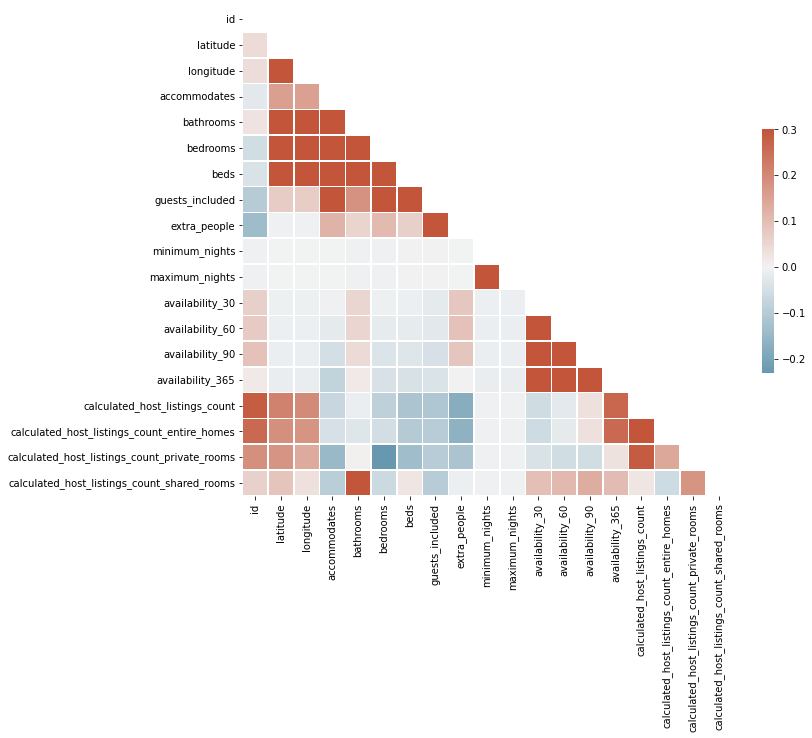

In [133]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})